In [1]:
import numpy as np
import pandas as pd
from ase.io import read, write
from ase.io.extxyz import read_extxyz
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest, ks_2samp
import os

plt.rc('font', family="sans-serif", weight="bold")          # controls default text sizes
plt.rc('axes', labelsize=15, titlesize=15, labelweight="bold", titleweight="bold")    # x and y axes
plt.rc('xtick', labelsize=15)    # Major Ticks
plt.rc('ytick', labelsize=15)    # Major Ticks
plt.rc('xtick.minor', visible=True)    # Minor Ticks
plt.rc('ytick.minor', visible=True)    # Minor Ticks
plt.rc('legend', fontsize=10)    # Legend
plt.rc('figure', titlesize=10)  # Figure title


plt.rcParams['figure.dpi'] = 300
print(plt.rcParams['font.family'])
directory = "Data/Induced_error/"

['sans-serif']


# Angles and Bond Lengths

In [2]:
def get_all_angles(mol, indices):
    angles = np.zeros((len(indices), len(mol)))
    for i, atom in enumerate(mol):
        angles[:,i] = atom.get_angles(indices)
    return angles

angles_indices = np.array([[5, 0, 1], [4, 0, 1], [3, 0, 1], [5, 0, 3], [4, 0, 3], [4, 0, 5], [0, 1, 2], [0, 1, 6], [0, 1, 7], [6, 1, 7], [6, 1, 2], [7, 1, 2], [1, 2, 8]])

bond_matrix = np.zeros((9,9))
bonds = [[0, 1], [0, 4], [0, 5], [0, 3], [1, 2], [1, 6], [1, 7], [2, 8]]
for index in bonds:
    bond_matrix[index[0], index[1]] = 1

def get_distances(mol):
    distances = np.zeros((len(mol[0]), len(mol[0]), len(mol)))
    for i, atom in enumerate(mol):
        distances[:,:,i] = np.triu(atom.get_all_distances())
    return distances

## Distributions

In [3]:
ref_data = read("Data\Seeds/EtOH_moldyn_data_500.xyz", index=":")
angles_indices = np.array([[5, 0, 1], [4, 0, 1], [3, 0, 1], [5, 0, 3], [4, 0, 3], [4, 0, 5], [0, 1, 2], [0, 1, 6], [0, 1, 7], [6, 1, 7], [6, 1, 2], [7, 1, 2], [1, 2, 8]])
angles_ref = get_all_angles(ref_data, angles_indices)
df_summary_angles = pd.DataFrame(columns=['Induced error [std]', 'min KS', 'max KS', 'mean KS', 'std KS'])
df_scores_angles = pd.DataFrame(columns=['Induced error [std]', '5, 0, 1', "4, 0, 1", "3, 0, 1", "5, 0, 3", "4, 0, 3", "4, 0, 5", "0, 1, 2", "0, 1, 6", "0, 1, 7", "6, 1, 7", "6, 1, 2", "7, 1, 2", "1, 2, 8"])
dist_ref = get_distances(ref_data)
df_summary_bonds = pd.DataFrame(columns=['Induced error [std]', 'min KS', 'max KS', 'mean KS', 'std KS'])
df_scores_bonds = pd.DataFrame(columns=["Induced error [std]", "0, 1", "0, 4", "0, 5", "0, 3", "1, 2", "1, 6", "1, 7", "2, 8"])

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith("xyz"):
        print(filename)
        induced_error = filename.replace("Simulation_error_analysis_sigma_", "")
        induced_error = float(induced_error.replace("_500.xyz", ""))
        model_data = read(directory+filename, index=":")
        angles_model = get_all_angles(model_data, angles_indices)
        KS_scores_angles = np.zeros(angles_ref.shape[0])
        row_scores_angles = [induced_error]
        for i in range(angles_ref.shape[0]):
            KS_scores_angles[i] = kstest(angles_model[i, :], angles_ref[i, :])[1]
            row_scores_angles.append(KS_scores_angles[i])
        row_summary_angles = [induced_error, KS_scores_angles.min(), KS_scores_angles.max(), np.mean(KS_scores_angles), np.std(KS_scores_angles)]
        df_summary_angles.loc[len(df_scores_angles)] = row_summary_angles
        df_scores_angles.loc[len(df_scores_angles)] = row_scores_angles

        dist_model = get_distances(model_data)
        KS_scores_bonds = np.zeros(len(bonds))
        row_scores_bonds = [induced_error]
        for i, index in enumerate(bonds):
            KS_scores_bonds[i] = kstest(dist_model[index[0],index[1], :], dist_ref[index[0],index[1], :])[1]
            row_scores_bonds.append(KS_scores_bonds[i])
        row_summary_bonds = [induced_error, KS_scores_bonds.min(), KS_scores_bonds.max(), np.mean(KS_scores_bonds), np.std(KS_scores_bonds)]
        df_summary_bonds.loc[len(df_summary_bonds)] = row_summary_bonds
        df_scores_bonds.loc[len(df_scores_bonds)] = row_scores_bonds
        
df_summary_angles.to_csv(directory+"Angles_KS_summary_induced_error.csv")        
df_scores_angles.to_csv(directory+"Angles_KS_scores_induced_error.csv") 
        
df_summary_bonds.to_csv(directory+"Bonds_KS_summary_induced_error.csv")        
df_scores_bonds.to_csv(directory+"Bonds_KS_scores_induced_error.csv") 

Simulation_error_analysis_sigma_0.001_500.xyz
Simulation_error_analysis_sigma_0.005_500.xyz
Simulation_error_analysis_sigma_0.0158_500.xyz
Simulation_error_analysis_sigma_0.01_500.xyz
Simulation_error_analysis_sigma_0.02_500.xyz
Simulation_error_analysis_sigma_0.05_500.xyz


## Average values

In [4]:
df_angles = pd.DataFrame(columns=['Induced error [std]', '5, 0, 1', 'std 5, 0, 1', "4, 0, 1", "std 4, 0, 1", "3, 0, 1", "std 3, 0, 1", "5, 0, 3", "std 5, 0, 3", "4, 0, 3", "std 4, 0, 3", "4, 0, 5", "std 4, 0, 5", "0, 1, 2", "std 0, 1, 2", "0, 1, 6", "std 0, 1, 6", "0, 1, 7", "std 0, 1, 7", "6, 1, 7", "std 6, 1, 7", "6, 1, 2", "std 6, 1, 2", "7, 1, 2", "std 7, 1, 2", "1, 2, 8", "std 1, 2, 8"])
df_bonds = pd.DataFrame(columns=["Induced error [std]", "0, 1", "std 0, 1", "0, 4", "std 0, 4", "0, 5", "std 0, 5", "0, 3", "std 0, 3", "1, 2", "std 1, 2", "1, 6", "std 1, 6", "1, 7", "std 1, 7", "2, 8", "std 2, 8"])

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith("xyz"):
        print(filename)
        induced_error = filename.replace("Simulation_error_analysis_sigma_", "")
        induced_error = float(induced_error.replace("_500.xyz", ""))
        model_data = read(directory+filename, index=":")
        dist_model = get_distances(model_data)
        angles_model = get_all_angles(model_data, angles_indices)
        row_angles = [induced_error]
        row_bonds = [induced_error]
        for index in bonds:
            row_bonds.append(np.mean(dist_model[bonds[0],bonds[1],:]))
            row_bonds.append(np.std(dist_model[bonds[0],bonds[1],:]))
        for i in range(len(angles_indices)):
            row_angles.append(np.mean(angles_model[i, :]))
            row_angles.append(np.std(angles_model[i, :]))

        df_bonds.loc[len(df_bonds)] = row_bonds
        df_angles.loc[len(df_angles)] = row_angles
        
df_angles.to_csv(directory+"Angles_induced_errors.csv")        
df_bonds.to_csv(directory+"Bonds_induced_errors.csv")

Simulation_error_analysis_sigma_0.001_500.xyz
Simulation_error_analysis_sigma_0.005_500.xyz
Simulation_error_analysis_sigma_0.0158_500.xyz
Simulation_error_analysis_sigma_0.01_500.xyz
Simulation_error_analysis_sigma_0.02_500.xyz
Simulation_error_analysis_sigma_0.05_500.xyz


# RMSD

In [2]:
def get_RMSD(mol):
    rmsd = []
    N = mol[0].get_global_number_of_atoms()
    for i in range(len(mol)):
        diff = mol[0].get_positions()-mol[i].get_positions()
        dist_sum = np.sum(diff[:,0]**2+diff[:,1]**2+diff[:,2]**2)
        rmsd.append(np.sqrt(dist_sum/N))
    return np.asanyarray(rmsd)

In [3]:
rmsd_1 = get_RMSD(read(directory+"Simulation_error_analysis_sigma_0.001_500.xyz", index=":"))
rmsd_2 = get_RMSD(read(directory+"Simulation_error_analysis_sigma_0.005_500.xyz", index=":"))
rmsd_3 = get_RMSD(read(directory+"Simulation_error_analysis_sigma_0.01_500.xyz", index=":"))
rmsd_4 = get_RMSD(read(directory+"Simulation_error_analysis_sigma_0.0158_500.xyz", index=":"))
rmsd_5 = get_RMSD(read(directory+"Simulation_error_analysis_sigma_0.02_500.xyz", index=":"))
rmsd_6 = get_RMSD(read(directory+"Simulation_error_analysis_sigma_0.05_500.xyz", index=":"))
rmsd_model = get_RMSD(read("Data/Seeds/SVD_not_regularized12_2_500.xyz", index=":"))
rmsd_ref = get_RMSD(read("Data/Seeds/EtOH_moldyn_data_500.xyz", index=":"))


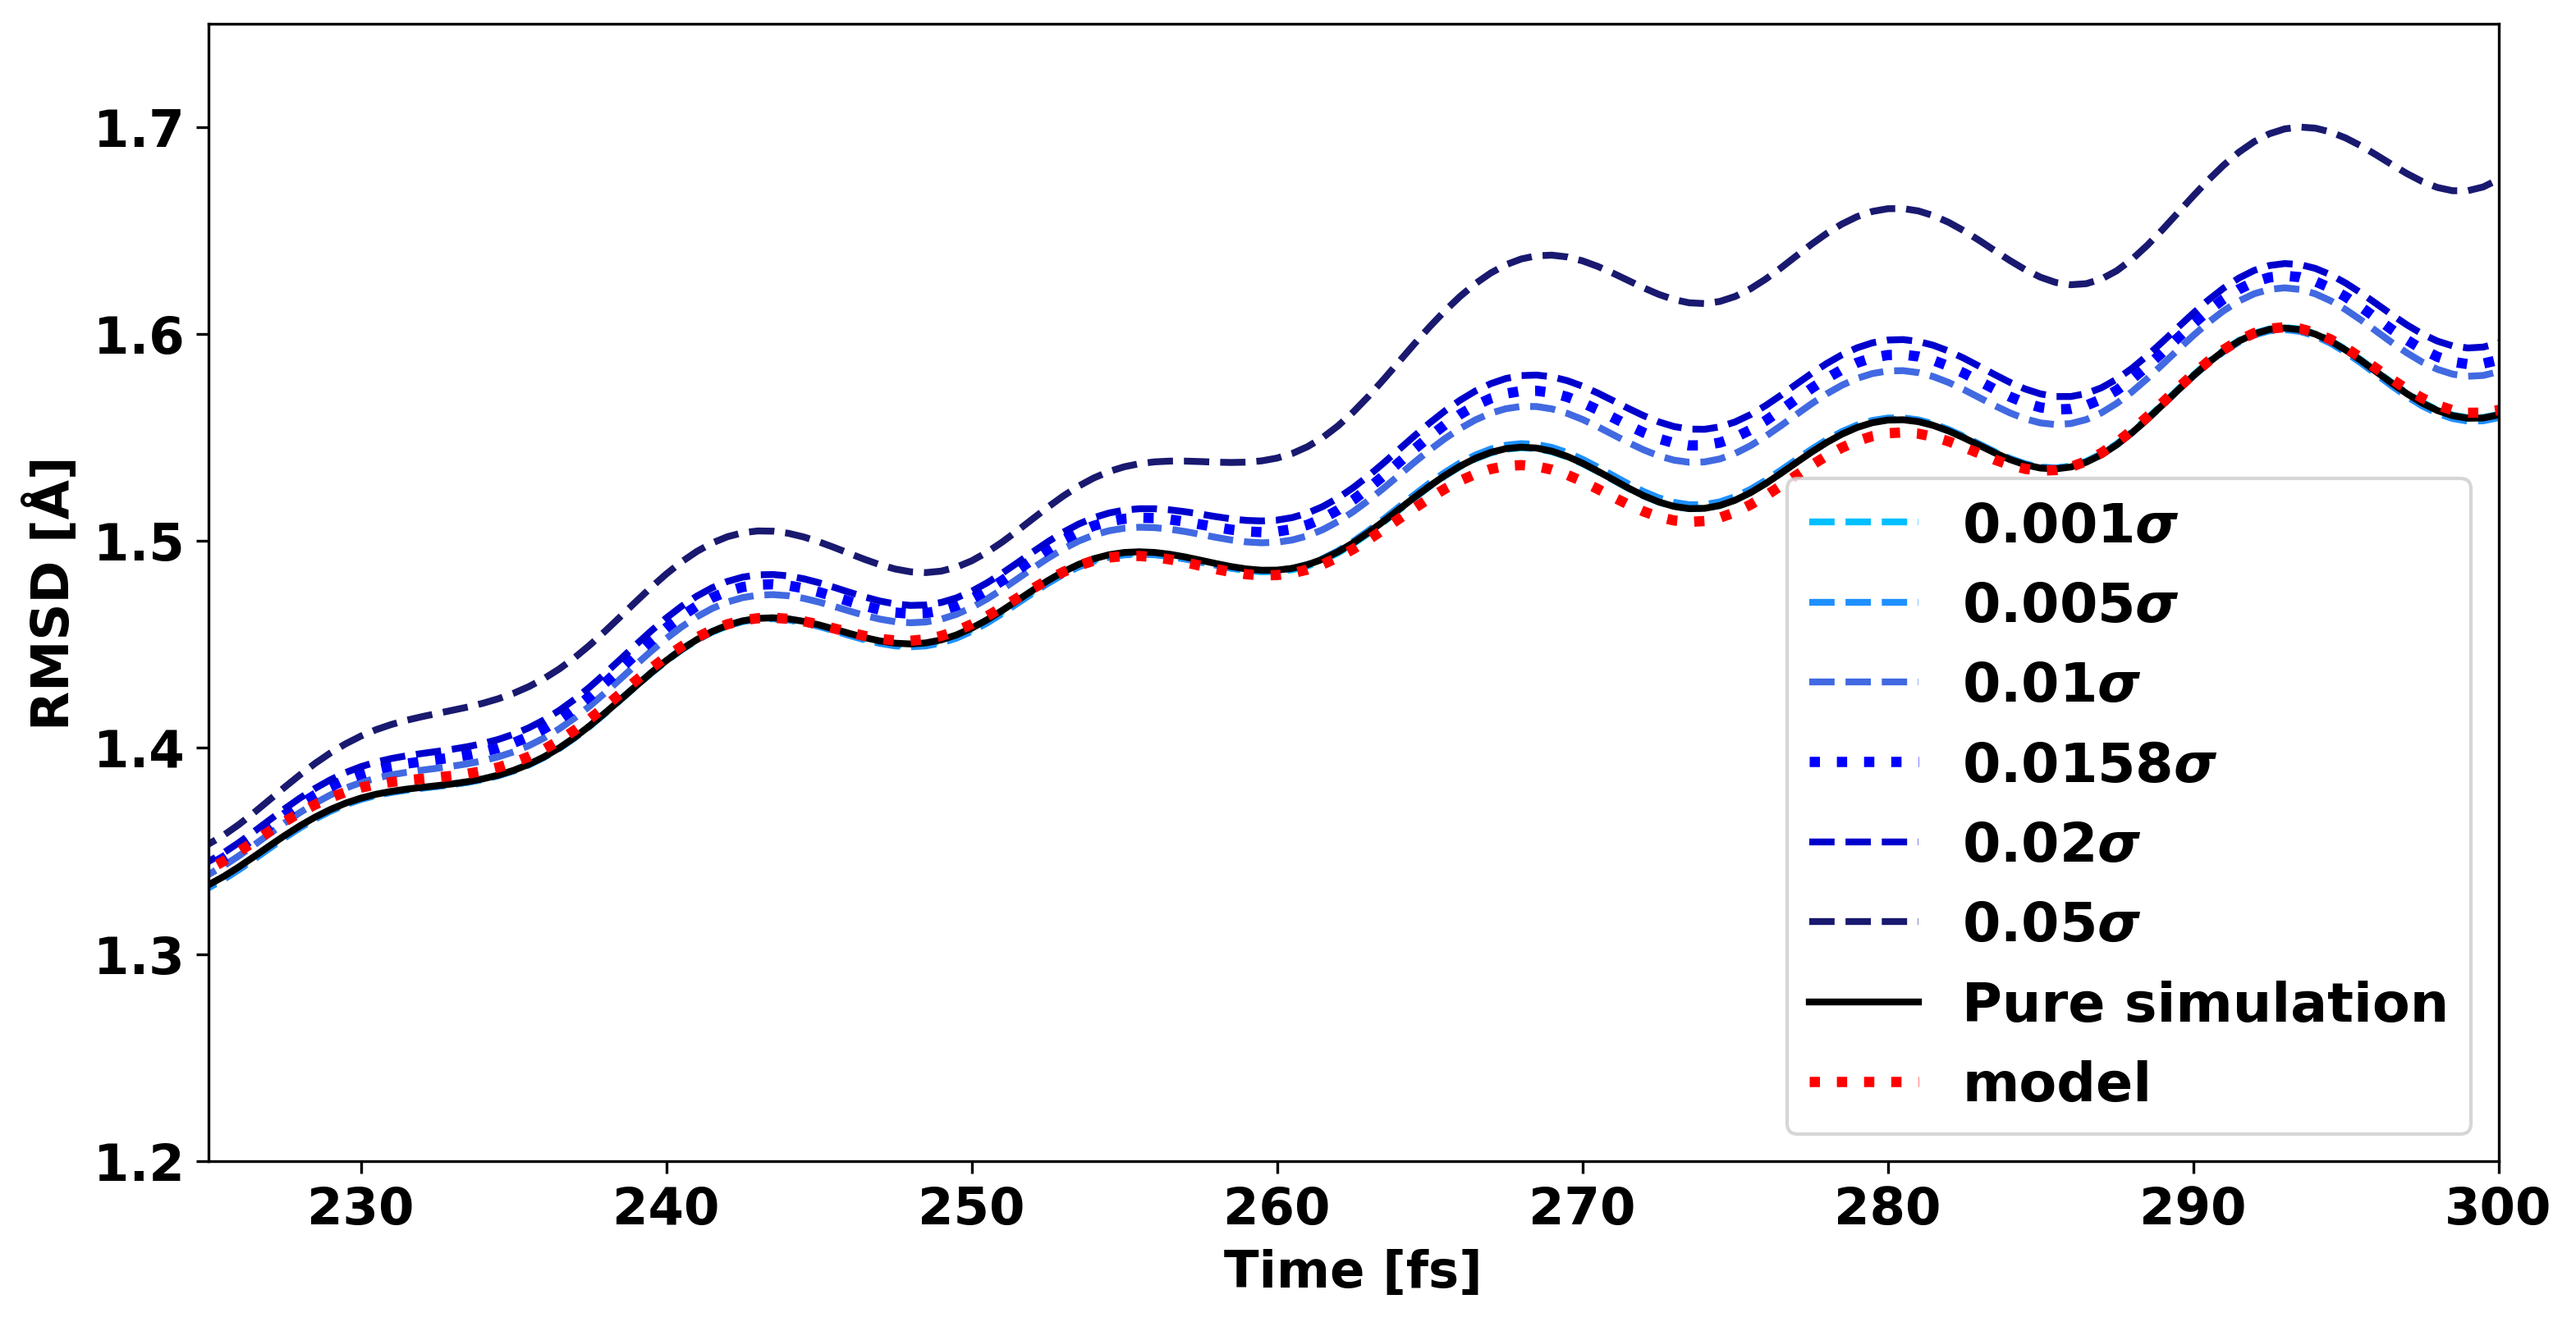

In [12]:
std = ["0.001", "0.005", "0.01", "0.0158", "0.02", "0.05"]
rmsd_errors = [rmsd_1, rmsd_2, rmsd_3, rmsd_4, rmsd_5, rmsd_6]
colors = ["deepskyblue", "dodgerblue", "royalblue", "blue", "mediumblue", "midnightblue"]
linestyle = ["dashed", "dashed", "dashed", "dotted", "dashed", "dashed"]
linewidth = [2, 2, 2, 3, 2, 2]
fig, ax = plt.subplots(1, figsize=(12, 6))
for i in range(len(rmsd_errors)):
    ax.plot(np.arange(len(rmsd_errors[i]))*0.5, rmsd_errors[i], label=std[i]+"$\sigma$", color=colors[i], linestyle=linestyle[i], linewidth=linewidth[i])
ax.plot(np.arange(len(rmsd_ref))*0.5, rmsd_ref, label="Pure simulation", color="black", linewidth=2)
ax.plot(np.arange(len(rmsd_model))*0.5, rmsd_model, label="model", color="red", linestyle="dotted", linewidth=3)

ax.set_xlabel("Time [fs]", fontweight="bold")
ax.set_ylabel("RMSD [Å]", fontweight="bold")
ax.set_ylim(1.2, 1.75)
ax.set_xlim(225, 300)
plt.legend(fontsize=16)
ax.minorticks_off()
plt.show()

# Conformational Isomers

In [5]:
def evaluate_isomer_vec(mol):
    proj = np.zeros(len(mol))
    for i, atom in enumerate(mol):
        pos = atom.get_positions()
        a = pos[8,:]-pos[2,:]
        b = pos[1,:]-pos[0,:]
        proj[i] = np.dot(a, b/np.linalg.norm(b))
    return proj

In [6]:
isomer_1 = evaluate_isomer_vec(read(directory+"Simulation_error_analysis_sigma_0.001_500.xyz", index=":"))
isomer_2 = evaluate_isomer_vec(read(directory+"Simulation_error_analysis_sigma_0.005_500.xyz", index=":"))
isomer_3 = evaluate_isomer_vec(read(directory+"Simulation_error_analysis_sigma_0.01_500.xyz", index=":"))
isomer_4 = evaluate_isomer_vec(read(directory+"Simulation_error_analysis_sigma_0.0158_500.xyz", index=":"))
isomer_5 = evaluate_isomer_vec(read(directory+"Simulation_error_analysis_sigma_0.02_500.xyz", index=":"))
isomer_6 = evaluate_isomer_vec(read(directory+"Simulation_error_analysis_sigma_0.05_500.xyz", index=":"))
isomer_ref = evaluate_isomer_vec(read("Data/Seeds/EtOH_moldyn_data_500.xyz", index=":"))
isomer_model = evaluate_isomer_vec(read("Data/Seeds/SVD_not_regularized12_2_500.xyz", index=":"))


14756
21069
8620
8572
6153
8486
17981
17493


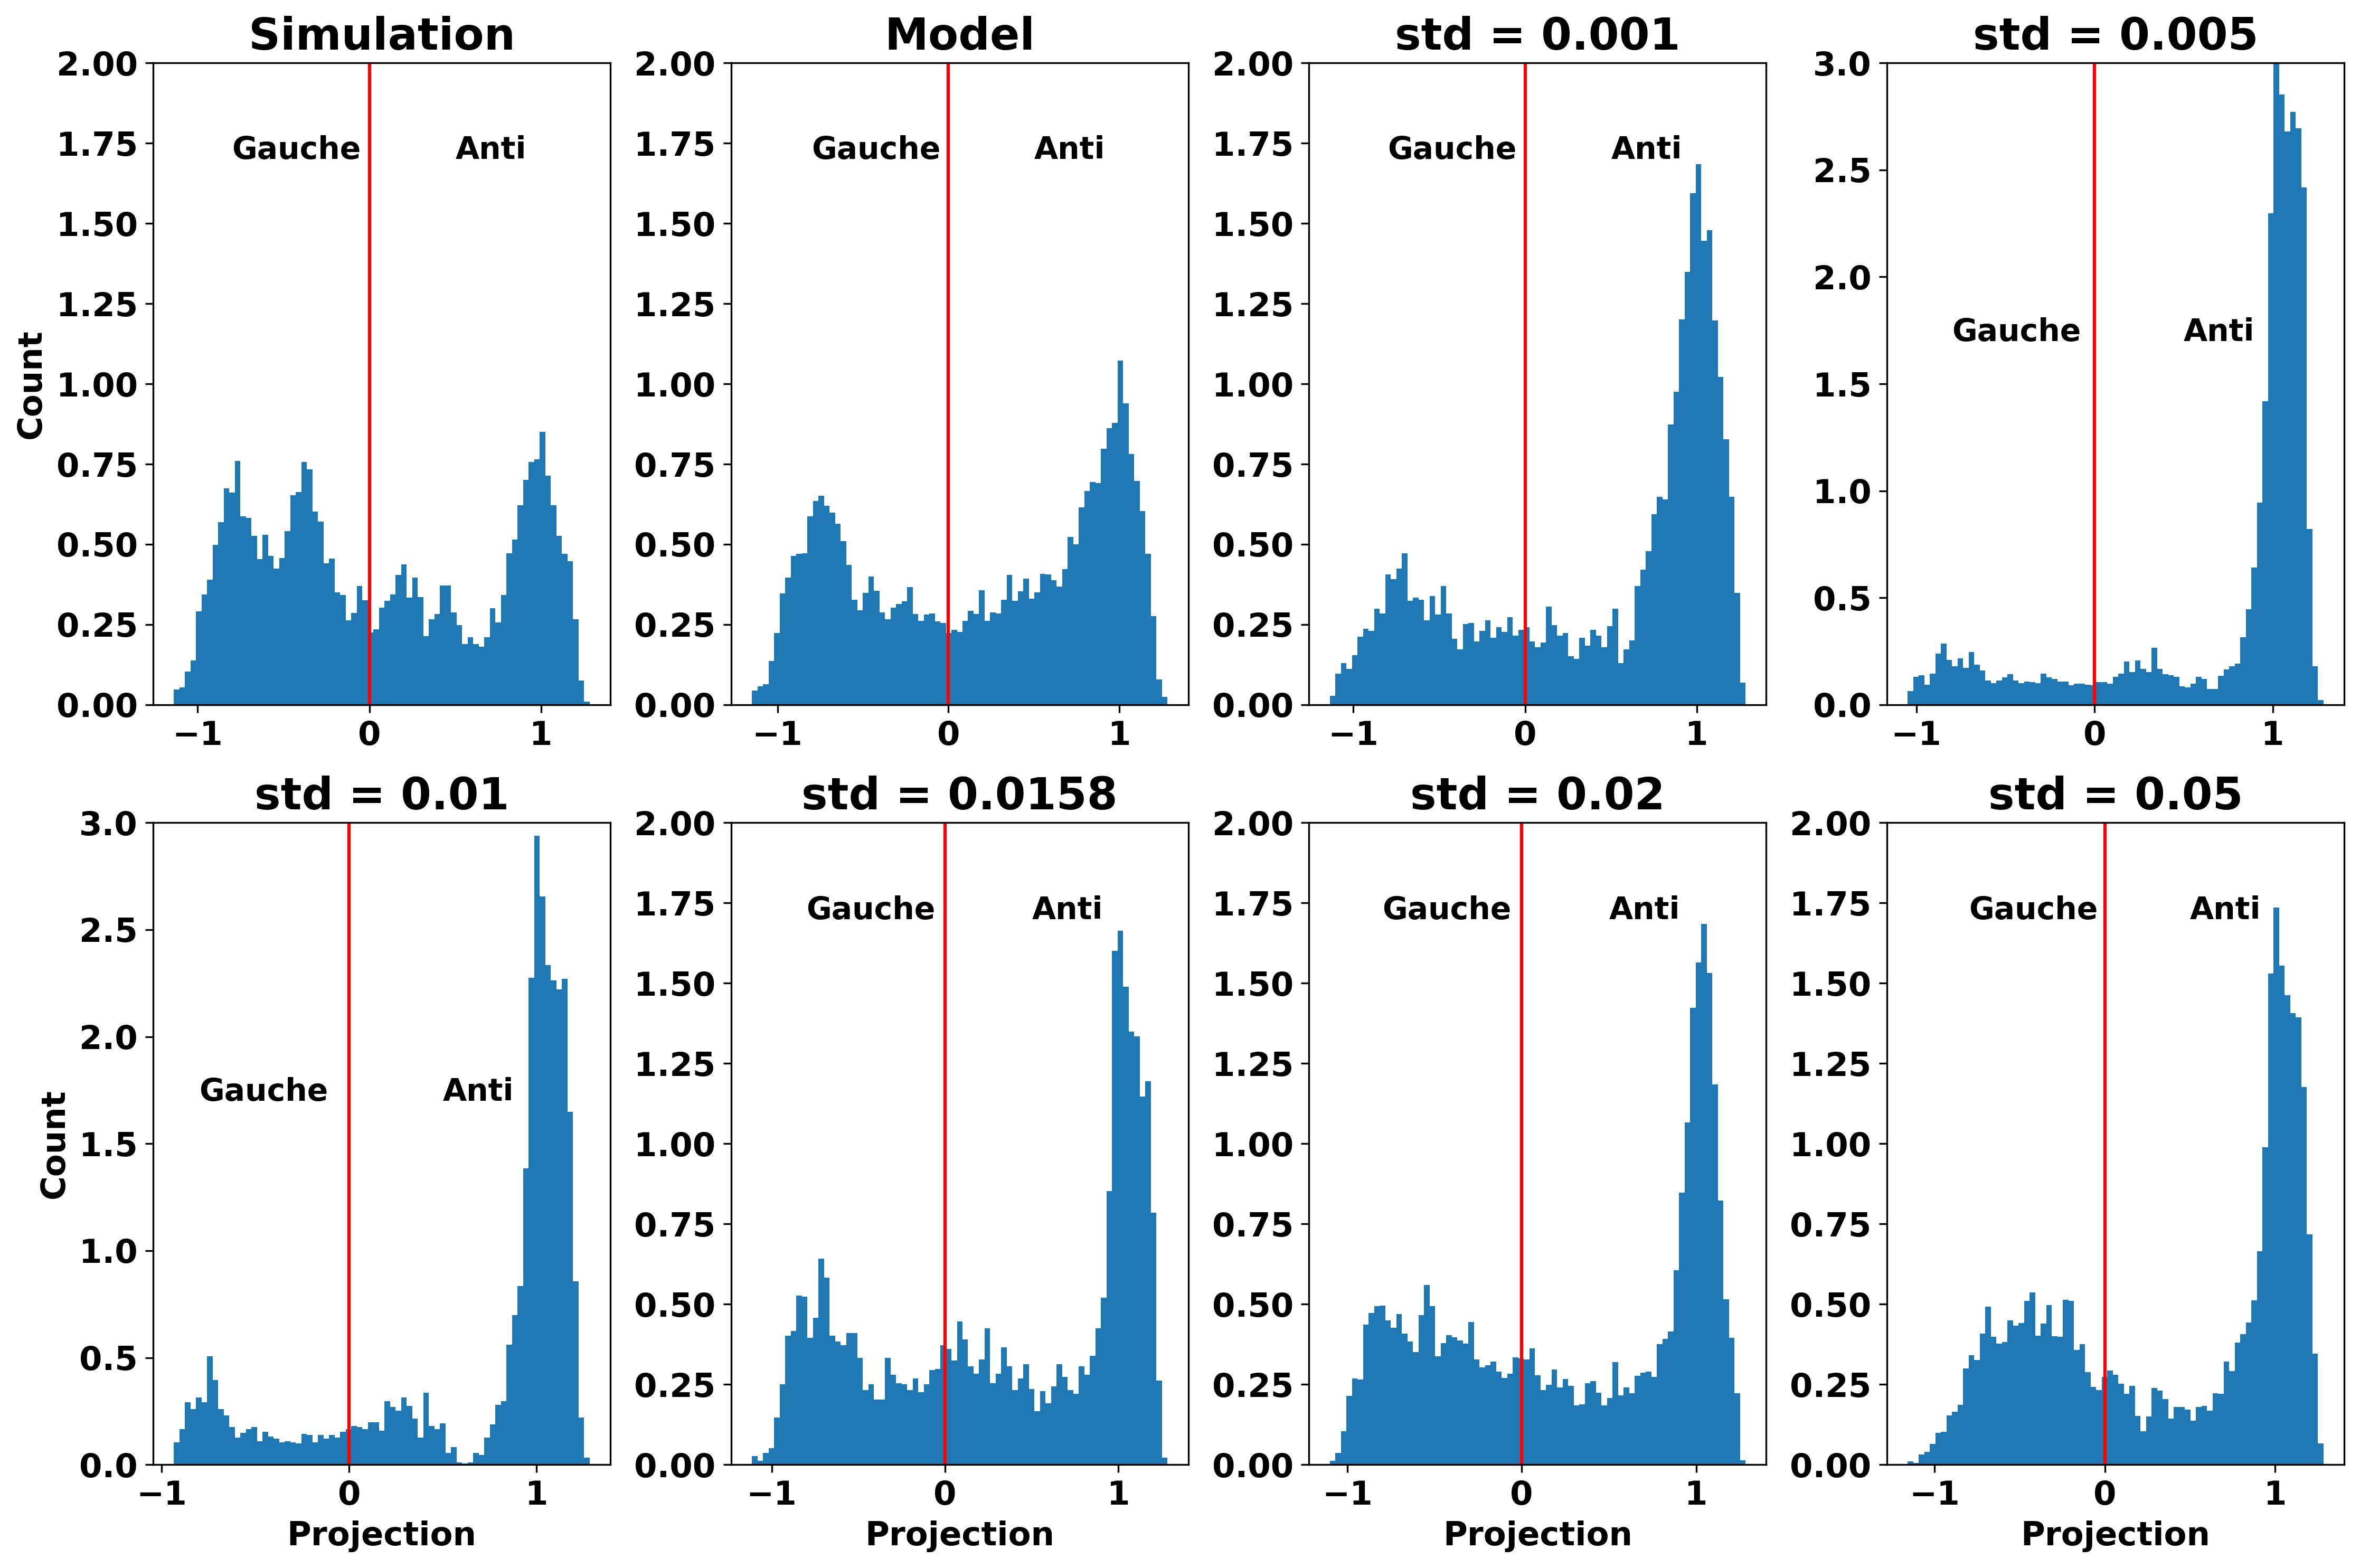

In [14]:
projections = [isomer_ref, isomer_model, isomer_1, isomer_2, isomer_3, isomer_4, isomer_5, isomer_6]
std = ["0.001", "0.005", "0.01", "0.0158", "0.02", "0.05"]
titles = ["Simulation", "Model", "std = "+std[0], "std = "+std[1], "std = "+std[2], "std = "+std[3], "std = "+std[4], "std = "+std[5]]
for proj in projections:
    print(len(proj))
fig, ax = plt.subplots(2, 4, figsize=(15,10))
nbins = 75
ax[-1, 0].set_xlabel("Projection")
ax[-1, 1].set_xlabel("Projection")
ax[-1, 2].set_xlabel("Projection")
ax[-1, 3].set_xlabel("Projection")
for i in range(2):
    ax[i, 0].set_ylabel("Count")
    for j in range(4):
        ax[i, j].hist(projections[4*i+j], bins=nbins, density=True)
        ax[i, j].set_title(titles[4*i+j], fontsize=20)
        ax[i, j].text(-0.8, 1.7, "Gauche", fontsize=14)
        ax[i, j].text(0.5, 1.7, "Anti", fontsize=14)
        ax[i, j].vlines(0, 0, 1000, color="r")
        ax[i, j].set_ylim(0, 2)
        ax[i, j].minorticks_off()
ax[0, 3].set_ylim(0, 3)
ax[1, 0].set_ylim(0, 3)
plt.tight_layout()
plt.show()